![BTS](https://github.com/vfp1/bts-dsf-2020/raw/main/Logo-BTS.jpg)

# Session 2: Logistic Regression EXERCISE

### Victor F. Pajuelo Madrigal <victor.pajuelo@bts.tech> - Classical Data Analysis

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vfp1/bts-cda-2020/blob/main/Session_2/Session_2_Logistic_Regression_EXERCISE.ipynb)

**Resources:**
* Sklearn documentation

# Logistic Regression Assignment

##Import libraries

In [11]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=18)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import urllib.request
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [96]:
urllib.request.urlretrieve('https://raw.githubusercontent.com/vfp1/bts-cda-2020/main/Session_2/banking.csv','banking.csv')
data = pd.read_csv('banking.csv')
data.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1


##EDA and Feature Engineering

In [97]:
data.education.unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

In [98]:
data.loc[(data['education']=='basic.4y') | (data['education']=='basic.6y') | (data['education']=='basic.9y'),'education'] = 'basic'
data.education.unique()

array(['basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

### Analyse the distribution of the target variable

36548
4640


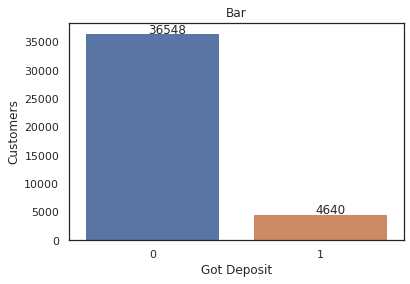

In [5]:
sns.set_theme(style="white")
ax = sns.countplot(x="y", data=data)

for p, label in zip(ax.patches, data.groupby(['y'])['y'].count()):
    ax.annotate(label, (p.get_x()+0.375, p.get_height()+0.15))
    print(label)

plt.title('Bar')
plt.xlabel('Got Deposit')
plt.ylabel('Customers')
plt.show()

In [6]:
# Put your code here
s=data.copy()
s = data.y
counts = s.value_counts()
percent = s.value_counts(normalize=True).mul(100).round(2).astype(str)
pd.DataFrame({'y':s.unique(),'counts': counts, 'per': percent})

,y,counts,per
0,0,36548,88.73
1,1,4640,11.27


What can we observe about the distribution of the target variable

ANSWER: **There is a big difference between customers with deposit and without deposit.**

**There must be a balance.**

### Observe how the different numeric variables behave for the 2 classes

DATASET DESCRIPTION

- age (numeric)
- job : type of job 
- marital : marital status
- education 
- default: has credit in default? 
- housing: has housing loan? 
- loan: has personal loan? 
- contact: contact communication type 
- month: last contact month of year 
- day_of_week: last contact day of the week 
- duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y=’no’). The duration is not known before a call is performed, also, after the end of the call, y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model
- campaign: number of contacts performed during this campaign and for this client 
- pdays: number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign 
- emp.var.rate: employment variation rate 
- cons.price.idx: consumer price index 
- cons.conf.idx: consumer confidence index 
- euribor3m: euribor 3 month rate 
- nr.employed: number of employees 
- y — Target variable: has the client subscribed a term deposit? 

In [108]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [7]:
data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


Observations:
- pdays- since 999 means client was not prevously contacted, and the mean for y=0 is higher, we can say that clients that has not been contacted are of course more probable to not subscribe. 
- previous- we can see that customers with subsciptions tend to be contacted more times before the campaign than the non subscriptions. 
- emp_var_rate- The mean employment variation rate is negative for customers with subscriptions.
- Confidence index, euribor 3 month rate and number of employees doesn't have much difference between subscriptions and non subscriptions. 

### Analyse other variables - Make some plots and discuss them

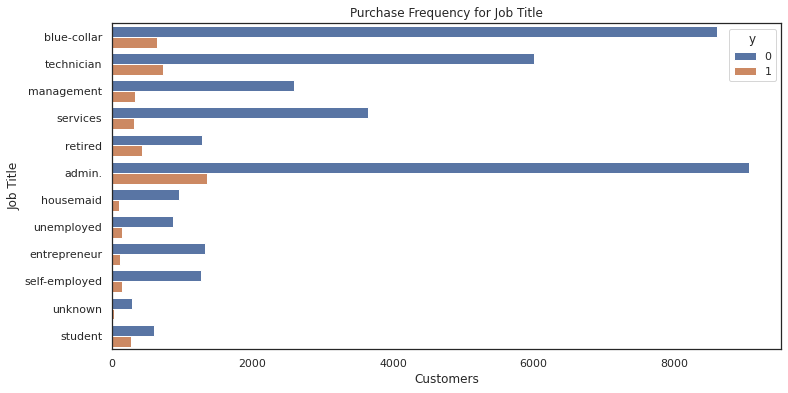

In [99]:
sns.set_theme(style="white")
plt.figure(figsize=(12,6))
sns.countplot(X="job", hue="y", data=data)
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Customers')
plt.ylabel('Job Title')
plt.show()

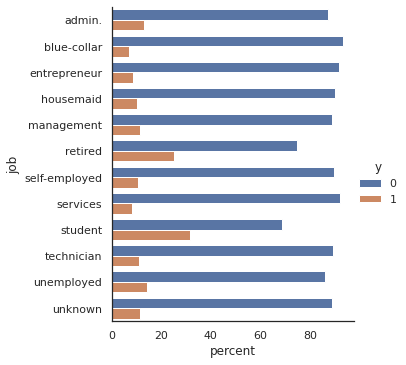

In [102]:
data.groupby('job')['y'].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x='percent',y='job',hue='y',kind='bar')

Retired and student has slightly higher rate. 

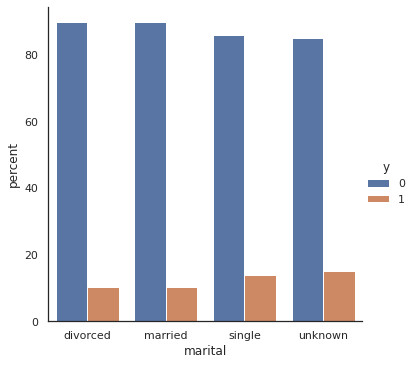

In [103]:
data.groupby('marital')['y'].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x='marital',y='percent',hue='y',kind='bar')

All the marital status have similar rate behaviour

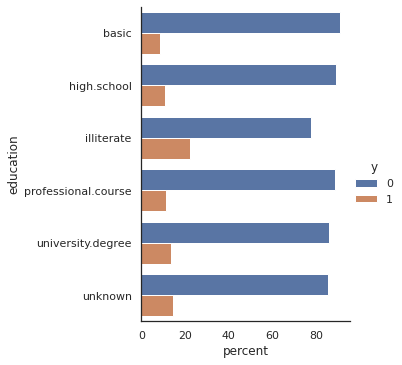

In [104]:
data.groupby('education')['y'].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x='percent',y='education',hue='y',kind='bar')

Illiterate education level has slightly higher rate than others. 

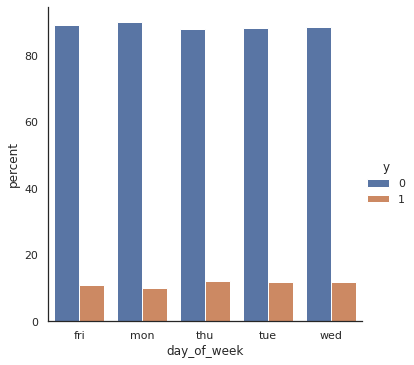

In [105]:
data.groupby('day_of_week')['y'].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x='day_of_week',y='percent',hue='y',kind='bar')

All days have similar rate behaviour. 

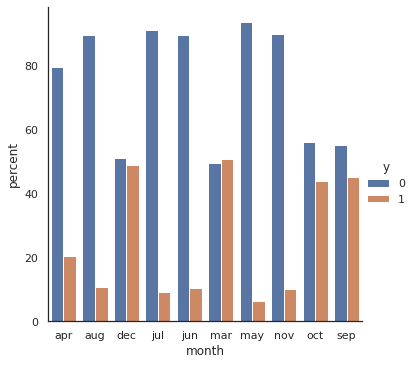

In [106]:
data.groupby('month')['y'].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x='month',y='percent',hue='y',kind='bar')

December, March, October and September are months where the deposit rate is higher. 

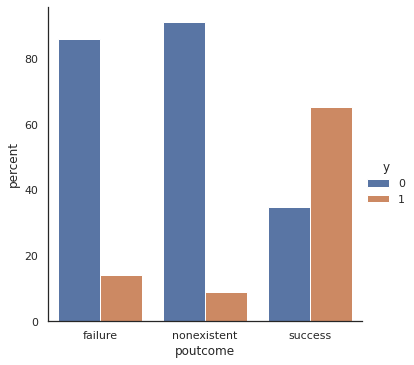

In [107]:
data.groupby('poutcome')['y'].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x='poutcome',y='percent',hue='y',kind='bar')

Successfull outcome of the previous marketing campaign has a higher rate than failure and nonexistent. 

###Create Dummy Variables

In [9]:
cols = list(data.select_dtypes(include = 'object').columns)

In [10]:
data = pd.get_dummies(data, columns=cols,drop_first=True)
data.head(3)

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1


##Implement the Logistic Regression Model

In [48]:
X =  data.drop(['y'], axis=1)
#X =  data.drop(['y'], axis=1)
#Y = data.loc[:, data.columns == 'y']
Y=data['y']

In [ ]:
print(X.shape)
print(Y.shape)

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(28831, 51)
(12357, 51)
(28831,)
(12357,)


In [50]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)

In [51]:
X_scaled

array([[-0.86882797,  0.00451141, -0.56856317, ..., -0.49673529,
        -2.49842955, -0.18549202],
       [ 0.37847866,  0.16183527, -0.56856317, ..., -0.49673529,
         0.40025143, -0.18549202],
       [ 0.28253199, -0.4751345 , -0.56856317, ..., -0.49673529,
         0.40025143, -0.18549202],
       ...,
       [-0.86882797,  0.43427415, -0.20654363, ...,  2.01314468,
         0.40025143, -0.18549202],
       [-1.0607213 , -0.21420713, -0.20654363, ..., -0.49673529,
         0.40025143, -0.18549202],
       [-0.67693465, -0.49815751, -0.56856317, ...,  2.01314468,
         0.40025143, -0.18549202]])

In [54]:
logmodel = LogisticRegression()
logmodel.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logmodel.score(X_test, Y_test)))

Accuracy of logistic regression classifier on test set: 0.91


In [56]:
y_pred = logmodel.predict(X_test)
metrics.confusion_matrix(Y_test,y_pred)

array([[10708,   273],
       [  814,   562]])

##Imbalanced Classes

In [82]:
# X =  data.drop(['y'], axis=1)
# Y = data['y']
X = data.loc[:, data.columns != 'y']
Y = data.loc[:, data.columns == 'y']

In [83]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)

# Create training and test set - test size:30% random_state=0
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=0)

# Apply oversampling ONLY ON training data
os_data_X,os_data_y= os.fit_resample(X_train, Y_train)

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y==0]))
print("Number of subscription",len(os_data_y[os_data_y==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y==1])/len(os_data_X))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


length of oversampled data is  51134
Number of no subscription in oversampled data 25567
Number of subscription 25567
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [84]:
k=pd.DataFrame(os_data_y,columns=['y'])
s=k.y
counts = s.value_counts()
percent = s.value_counts(normalize=True).mul(100).round(2).astype(str) #+ '%'
pd.DataFrame({'y':s.unique(),'counts': counts, 'per': percent})

,y,counts,per
1,0,25567,50.0
0,1,25567,50.0


In [85]:
# Prepare thedata qith the oversampled dataset
X = os_data_X
Y = os_data_y
# Create training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=0)

# Create an instance of the logistic regression model
logreg =  LogisticRegression()

#Fit the model
logreg.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [86]:
#Compute predictions
y_pred = logreg.predict(X_test)

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logmodel.score(X_test, Y_test)))

Accuracy of logistic regression classifier on test set: 0.69


In [89]:
metrics.accuracy_score(Y_test,y_pred)

0.8498794081220259

In [80]:
metrics.confusion_matrix(Y_test,y_pred)

array([[6449, 1217],
       [1086, 6589]])

In [90]:
Prec=6589/(1217+6589)
Rec=6589/(1086+6589)
Acc=(6589+6449)/(1086+6589+1217+6449)
print('Precicion:', Prec, ' Recall: ', Rec, 'Accuracy: ', Acc)

Precicion: 0.8440942864463233  Recall:  0.8585016286644951 Accuracy:  0.8498794081220259


In [91]:
print(metrics.classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      7666
           1       0.84      0.86      0.85      7675

    accuracy                           0.85     15341
   macro avg       0.85      0.85      0.85     15341
weighted avg       0.85      0.85      0.85     15341



In reality, there are 7675 deposits and 7666 non deposits. The model predicted 7806 deposits and 7535 non deposits  

Model's precision says that 84% of the predicted customers, will result deposits. This means that 16% of the predited deposits will be wrong.(false positives) 

Model's recall says that the prediction will be able to identify 86% of the real deposit customers. Meaning that 14% of deposit customers will not be identified. (false negatives)